In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 最適化対象の関数
wikipediaから
https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [2]:
def goldstein_price(x, y):
    a1 = (x + y) ** 2
    a2 = 19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2
    a3 = 1 + a1**2*a2
    a4 = (2*x - 3*y) ** 2
    a5 = 18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2
    a6 = 30 + a4*a5
    return a3*a6

In [3]:
x = np.linspace(-20, 20, 30)
y = np.linspace(-20, 20, 30)
x, y = np.meshgrid(x, y)
z = goldstein_price(x, y)

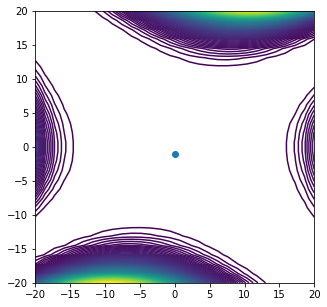

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.contour(x,y,z,levels=200)
ax.scatter(0,-1) # 最適解

真ん中の方でだいぶ平たい。これを、いくつかのアルゴリズムで最適化の実験をする

In [5]:
X = tf.Variable(1, dtype=tf.float32)
Y = tf.Variable(1, dtype=tf.float32)
COST = goldstein_price(X, Y)

In [6]:
def run_optimize(optimizer, num_step=100):
    param_hist = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        param_hist.append(sess.run((X, Y)))
        for _ in range(num_step):
            sess.run(optimizer)
            var = sess.run((X, Y))
            param_hist.append(var)
    return np.array(param_hist)

In [7]:
def plot_contour(x, y, f, ax):
    z = f(x, y)
    ax.contour(x, y, z)

In [8]:
def plot_contour2(xlim, ylim, f, ax):
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    x, y = np.meshgrid(x, y)
    z = f(x, y)
    ax.contour(x, y, z)

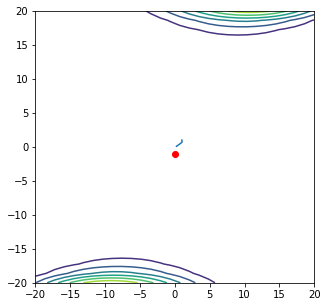

In [9]:
gd_step = tf.train.GradientDescentOptimizer(0.00001).minimize(COST)
gd_hist = run_optimize(gd_step, 200)

fig, ax = plt.subplots(figsize=(5,5))
plot_contour(x, y, goldstein_price, ax)
ax.scatter(0, -1, color='red')
ax.plot(gd_hist[:,0], gd_hist[:,1])

In [10]:
adam_step = tf.train.AdamOptimizer(
    learning_rate=0.1,
    beta1=0.9,
    beta2=0.999,    
    epsilon=1e-08).minimize(COST)
adam_hist = run_optimize(adam_step, 200)

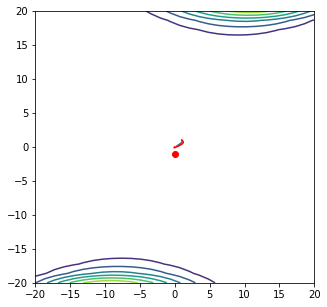

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
plot_contour(x, y, goldstein_price, ax)
ax.scatter(0, -1, color='red')
ax.plot(gd_hist[:,0], gd_hist[:,1])
ax.plot(adam_hist[:,0], adam_hist[:,1], color='red')

## 2次形式で試す

In [12]:
def quad(x, y):
    return 0.05 * x**2 + y**2

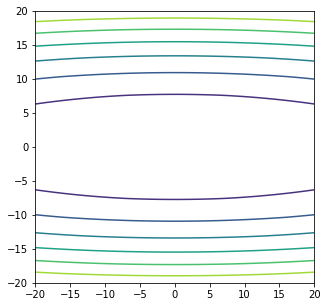

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
plot_contour(x, y, quad, ax)

In [14]:
X = tf.Variable(20, dtype=tf.float32)
Y = tf.Variable(1, dtype=tf.float32)
COST2 = quad(X, Y)

In [15]:
gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(COST2)
gd_hist = run_optimize(gd_step, 200)

In [16]:
adam_step = tf.train.AdamOptimizer(
    learning_rate=0.3,
    beta1=0.6,
    beta2=0.6,    
    epsilon=0.1).minimize(COST2)
adam_hist = run_optimize(adam_step, 200)

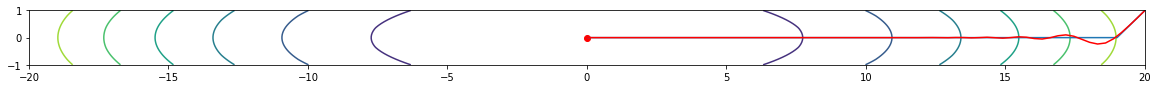

In [17]:
fig, ax = plt.subplots(figsize=(20,1))
plot_contour2((-20, 20), (-1,1), quad, ax)
ax.scatter(0, 0, color='red')
ax.plot(gd_hist[:,0], gd_hist[:,1])
ax.plot(adam_hist[:,0], adam_hist[:,1], color='red')

あんまりAdamが良い、という結果は出せなかった・・・